# Extract modelable data from pycisTopic object

In [75]:
import os
import sys
import pickle
import logging
import argparse
import pandas as pd
from scipy import io
sys.path.append("/cellar/users/aklie/projects/ML4GLand/collabs/er_stress_regulation")
from utils import load_cisTopic_model
from pycisTopic.cistopic_class import create_cistopic_object

In [85]:
# Define 
directory = "/cellar/users/aklie/data/ml4gland/collabs/er_stress_regulation/test_script"
dataset_name = "test_script"

# Build the cisTopic object

In [77]:
# Load the LDA model
model = load_cisTopic_model(dataset_dir=directory, dataset_name=dataset_name)

/cellar/users/aklie/data/ml4gland/collabs/er_stress_regulation/test_script/test_script.cellMat.feather /cellar/users/aklie/data/ml4gland/collabs/er_stress_regulation/test_script/test_script.regionMat.feather


In [78]:
# Load the fragment count matrix (likely will take minutes if have a lot of cells and regions)
fragment_matrix = io.mmread(os.path.join(directory, dataset_name + ".countMatrix.mtx"))
fragment_matrix = fragment_matrix.tocsr()

In [79]:
# Load in cell and region metadata
cell_data = pd.read_csv(os.path.join(directory, dataset_name + ".cellData.tsv"), sep="\t")
region_data = pd.read_csv(os.path.join(directory, dataset_name + ".regionData.tsv"), sep="\t")

In [80]:
# Create a pycisTopic object
cisTopic_obj = create_cistopic_object(
    fragment_matrix=fragment_matrix, 
    cell_names=cell_data.index, 
    region_names=region_data.index, 
    split_pattern="", 
    project=""
)
cisTopic_obj

2023-04-14 17:32:03,050 cisTopic     INFO     Creating CistopicObject
2023-04-14 17:32:03,479 cisTopic     INFO     Done!


In [81]:
# Also add the cell annotation
cisTopic_obj.add_cell_data(cell_data)

In [84]:
# Add the cisTopic model to the pycisTopic object
cisTopic_obj.add_LDA_model(model)

In [86]:
# Save the pycisTopic object
pickle.dump(
    cisTopic_obj,
    open(os.path.join(directory, dataset_name + ".pycisTopic_obj.pkl"), "wb")
)

# Double check the data

In [118]:
data_dir = "/cellar/users/aklie/data/ml4gland/collabs/er_stress_regulation"
dataset_name = "test"

In [119]:
cisTopic_obj = pickle.load(open(os.path.join(data_dir, dataset_name, dataset_name + ".pycisTopic_obj.pkl"), "rb"))

In [120]:
len(cisTopic_obj.cell_data.index)

100

In [122]:
cisTopic_obj.selected_model.topic_region.index

Index(['chr1:9855-10355', 'chr1:17143-17643', 'chr1:181178-181678',
       'chr1:182463-182963', 'chr1:183295-183795', 'chr1:184122-184622',
       'chr1:186654-187154', 'chr1:190631-191131', 'chr1:191194-191694',
       'chr1:267749-268249',
       ...
       'chrX:155767354-155767854', 'chrX:155768327-155768827',
       'chrX:155820025-155820525', 'chrX:155874423-155874923',
       'chrX:155881018-155881518', 'chrX:155888130-155888630',
       'chrX:156008642-156009142', 'chrX:156019694-156020194',
       'chrX:156025065-156025565', 'chrX:156029918-156030418'],
      dtype='object', length=185580)

In [38]:
from pycisTopic.clust_vis import run_umap, plot_metadata
run_umap(cisTopic_obj, target = 'cell', scale=True)

2023-04-14 13:13:03,176 cisTopic     INFO     Running UMAP


In [39]:
cisTopic_obj.cell_data.head()

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,nCounts,nAcc,donor,condition,disease,condition.disease,densityClust
AAACAGCCATAGACCC-1_1,9264,3.966799,7873,3.89614,,9264,7873,HP21167,control,ND,control.ND,3
AAACAGCCATCCCTCA-1_1,6039,3.780965,5549,3.744215,,6039,5549,HP21167,control,ND,control.ND,3
AAACCGGCATAGCTGC-1_1,13763,4.138713,11528,4.061754,,13763,11528,HP21167,control,ND,control.ND,3
AAAGCCCGTGCGCAAT-1_1,7158,3.854792,6466,3.810636,,7158,6466,HP21167,control,ND,control.ND,3
AAAGGACGTGTTGTAG-1_1,11228,4.050302,10025,4.001084,,11228,10025,HP21167,control,ND,control.ND,3


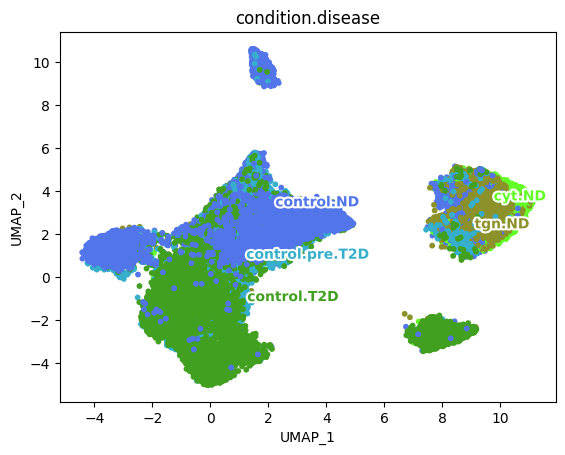

In [40]:
plot_metadata(cisTopic_obj, reduction_name = 'UMAP', variables = ['condition.disease'])